In [1]:
%matplotlib inline


# A demo of the Spectral Biclustering algorithm

This example demonstrates how to generate a checkerboard dataset and
bicluster it using the Spectral Biclustering algorithm.

The data is generated with the ``make_checkerboard`` function, then
shuffled and passed to the Spectral Biclustering algorithm. The rows
and columns of the shuffled matrix are rearranged to show the
biclusters found by the algorithm.

The outer product of the row and column label vectors shows a
representation of the checkerboard structure.


consensus score: 1.0


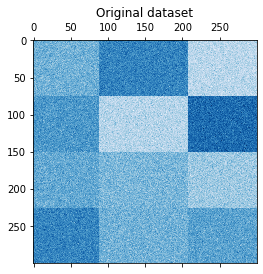

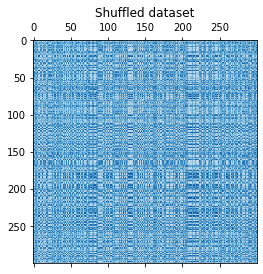

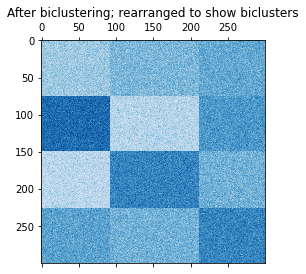

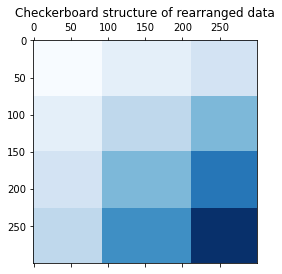

In [2]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score


n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")

plt.show()

In [3]:
print(row_idx)

[208 188  12 221 239 136 230 206  52 108 290  15 184 248  22  74 270  90
 229 164 190 103 124 129 222 116 194 286 234 295  92  66   8 122 219 150
 176 182 299   5 223  89  81  34  55 139 236  64   7  45  73 213 173 106
  59 253 168  26 284 153 134 145  63 293 285 224 252 111  20  46 156 228
 273  27 144 259  37  97 191 135 118 160 264 214 238  76 212 225 255 237
 282  44 272 189 152 158 101  54 181  18 281 250 126 171  71 227 245 205
 288 215 154 159  33  83 249  60 167 280 110  21  29 146  16  56  75 109
 175 201 161   4  96 166  61  67 137 198 262 279  40 268  13 107 220   3
 157 125  24  30  77 291 210  19 254 241 266  80  51   2 235 104 179  86
  10 199  58  41  14 155  50 292 233 123 200  62 187 226 130 209 260  43
 114 138 294 218 149 112 247  98 217  93 216 162  36 178 113   0  94 275
  95 296 261 240  69  49  48  85 297 141 207  23 246 148 143  78 180 100
 204 131 267 298 196   6  68 203  84 170 121 140 256 274 142 257  91  82
 283  11 119 102  35  57 169 231  65   1 120 269 18

In [4]:
print(col_idx)

[149  96 123  25  23 257 130 236 228 231 180 133 211 184 175 159 143 223
 225  19 187 110 183 189 200 263  37  88  82  90 250 182  31  27  14 165
   2   1 145 125 224 269  41 218 170 204 276 202 210  11  10 132  40  47
 288 107  98 279  64 241  15  12 258 190 239 235  75 103 268  62 294  77
 206 222  66  35  17 271 281  45  50  57 226 217 214  32  78 142 186 192
 146  89 213 127 247  46 156 205 254  21 168 262 166 282 299 261   0  95
 150  71 178 102 283 108 152  85  67 122  84 118 298 245 176  33 291 179
  73 240 109 252 249 292 215 212 134  69  99 162 196  39 233 275 129 221
 140 131 251 113 234  76 172 111 157   9 169 289 297  91 104 138 112  68
  36 188  65  42 126   3 242 148 286 270 265 128 137 244   7  86 119 229
 115 161  29 155 197 185 101  97  20 153  54  30 232  49 100 260 284 151
 114  56 144  60 194 199   6   8  79 267 208 264 216 259 255  38 230 121
 272  44 293 287 248 237 163 124 154  80  59 285  48  53  70 193 273 253
 243  55 171  58 181 158 246  34 117  18 290 266  5

In [10]:
print(rows)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [11]:
print(columns)

[[ True  True  True ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True  True]]


In [15]:
model.biclusters_

(array([[ True,  True, False, ..., False, False,  True],
        [ True,  True, False, ..., False, False,  True],
        [ True,  True, False, ..., False, False,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False,  True, False],
        [ True,  True,  True, ..., False, False,  True],
        [False, False, False, ...,  True, False, False],
        ...,
        [False, False, False, ..., False,  True, False],
        [ True,  True,  True, ..., False, False,  True],
        [False, False, False, ...,  True, False, False]]))

In [19]:
len(model.biclusters_[0][0])

300

In [20]:
len(model.biclusters_[1][0])

300